In [1]:
import gymnasium as gym
from minigrid.wrappers import ImgObsWrapper, FullyObsWrapper
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from two_room_env import TwoRoomEnv
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from stable_baselines3 import PPO
from cnn import MinigridFeaturesExtractor
from stable_baselines3.common.utils import obs_as_tensor

pygame 2.5.2 (SDL 2.28.3, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [39]:
# For 2 Room fully observable
config = {
    "policy_type": "CnnPolicy",
    "total_timesteps": 5e5,
    "env_name": "Two-Room",
    "feat_dim":8,
}

In [40]:
# load agent
model = PPO.load("/Users/kevinroice/Documents/research/discovery/models/tf5hze1v/model")

In [41]:
def make_env():
    env = TwoRoomEnv(render_mode="rgb_array")
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

def pre_process_obs(obs, model):
    obs = np.transpose(obs, (0,3,1,2)) # bring colour channel to front
    return obs_as_tensor(obs, model.policy.device)

In [42]:
# env = DummyVecEnv([make_env])
env = DummyVecEnv([make_env])
obs = env.reset()

In [49]:
def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []

    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(2):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs) 
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

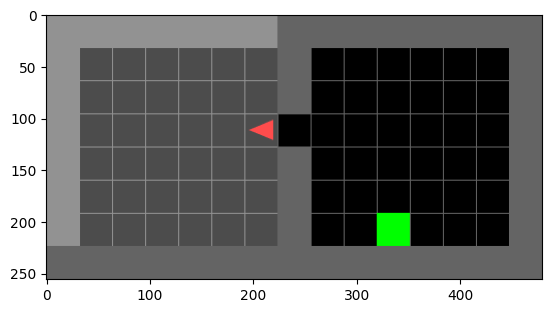

In [50]:
obs = get_hallway_obs(env, see_obs=True)

In [51]:
obs_list = get_hallway_obs(env, see_obs=False)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model)
        x = model.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

In [ ]:
max_feat_list

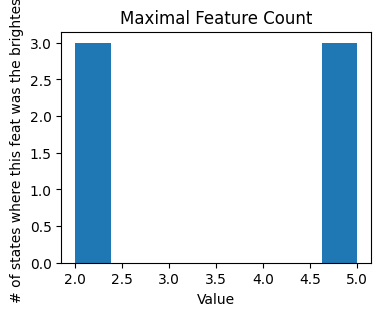

In [52]:
plt.figure(figsize=(4, 3))
plt.hist(max_feat_list, bins=config["feat_dim"])
plt.xlabel('Value')
plt.ylabel('# of states where this feat was the brightest')
plt.title('Maximal Feature Count')
plt.show()

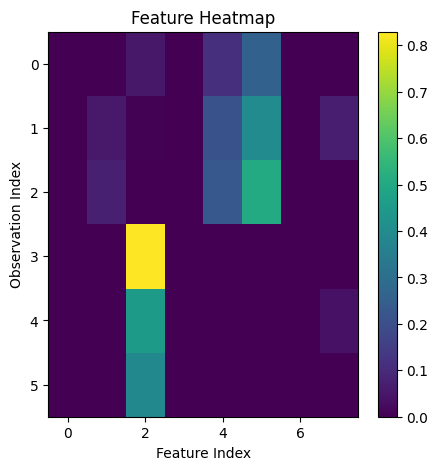

In [53]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='viridis', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap')
plt.show()

# Moving Hallway
We take our agent(`tf5hze1v`) and place it in an environment where the position of the hallway has changed.
* Hallway at (4, 7) (agent `o3jbjpx6`)
* Hallway at (5, 7) (agent `10ojf91l`)
* Hallway at (1, 7) (agent `gbhx588x`)

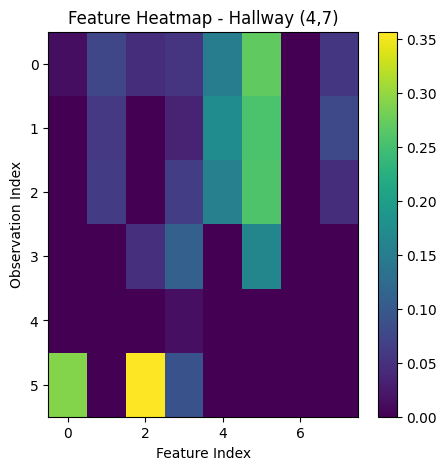

In [54]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_1 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/o3jbjpx6/model")
# make right env
def make_env_one():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(4,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_one])

def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(3):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

obs_list = get_hallway_obs(env, see_obs=False)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_1)
        x = model_1.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='viridis', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap - Hallway (4,7)')
plt.show()

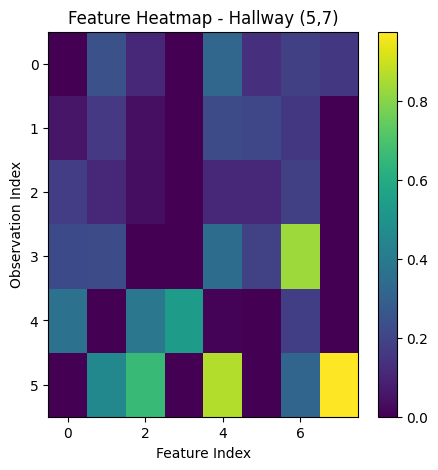

In [55]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_2 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/10ojf91l/model")
# make right env
def make_env_two():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(5,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_two])

def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    for i in range(4):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

obs_list = get_hallway_obs(env, see_obs=False)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_2)
        x = model_2.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='viridis', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap - Hallway (5,7)')
plt.show()

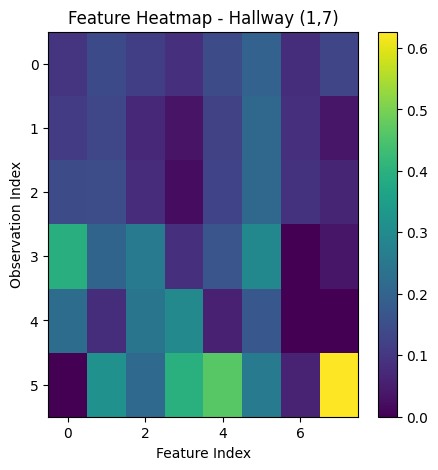

In [56]:
## If this cell doesnt work, restart the kernel and run the first cell, then come back here

# load agent
model_3 = PPO.load("/Users/kevinroice/Documents/research/discovery/models/gbhx588x/model")
# make right env
def make_env_three():
    env = TwoRoomEnv(render_mode="rgb_array", hallway_pos=(1,7))
    env = FullyObsWrapper(env)
    env = ImgObsWrapper(env)
    env = Monitor(env)
    return env

env = DummyVecEnv([make_env_three])

def get_hallway_obs(env, see_obs=False):
    # # Vector Action Encoding:
    # 0 = left
    # 1 = right
    # 2 = forward
    obs = env.reset() # initial obs
    obs_list = []
    for i in range(5):
        obs, _, _, _ = env.step([2])
    obs, _, _, _ = env.step([1])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    obs, _, _, _ = env.step([0])
    obs, _, _, _ = env.step([0])
    obs_list.append(obs)

    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    obs, _, _, _ = env.step([2])
    obs_list.append(obs)
    
    if see_obs:
        img = env.render()
        plt.imshow(np.concatenate([img], 1)) # shows the full environment
        plt.show()
    
    return obs_list

obs_list = get_hallway_obs(env, see_obs=False)
max_feat_list = []
feature_activations = []

with torch.no_grad():
    for obs in obs_list:
        obs = pre_process_obs(obs, model_2)
        x = model_2.policy.extract_features(obs)
        max_feat_list.append(torch.argmax(x).item())
        feature_activations.append(x.reshape(1, -1))

feature_activations = torch.cat(feature_activations, dim=0)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
plt.imshow(feature_activations, cmap='viridis', aspect='auto')
# y_tick_positions = [i * 56 for i in range(785 // 56)] # 16 by 16
# y_tick_positions = [i * 12 for i in range(36 // 12)]
plt.yticks(range(len(obs_list)))
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Observation Index')
plt.title('Feature Heatmap - Hallway (1,7)')
plt.show()